In [1]:
from BayesianHoldem import BayesianHoldem
import torch

model = BayesianHoldem()

for i in range(10):
    card_representation = torch.randn(6, 13, 4)
    action_representation = torch.randn(24, 4, 4)
    prediction = model.predict_action(action_representation, card_representation)
    if prediction == 0:
        print(f"prediction {i}: Fold")
    elif prediction == 1:
        print(f"prediction {i}: Check/Call")
    elif prediction == 2:
        print(f"prediction {i}: Bet/Raise (BB)")
    elif prediction == 3:
        print(f"prediction {i}: All-in")

prediction 0: Bet/Raise (BB)
prediction 1: Fold
prediction 2: All-in
prediction 3: All-in
prediction 4: Check/Call
prediction 5: Bet/Raise (BB)
prediction 6: Bet/Raise (BB)
prediction 7: Check/Call
prediction 8: Bet/Raise (BB)
prediction 9: Check/Call


In [35]:
import pokerkit as pk

big_blind = 100
small_blind = 0.5*big_blind
blinds = [small_blind, big_blind]
ante = 0
min_bet = 0.5*big_blind
player_count = 2

P1_stack = 100*big_blind
P2_stack = 50*big_blind

game = pk.NoLimitTexasHoldem(
    # Automations - everything is automatic except for player actions
    (
        pk.Automation.ANTE_POSTING,
        pk.Automation.BET_COLLECTION,
        pk.Automation.BLIND_OR_STRADDLE_POSTING,
        pk.Automation.CARD_BURNING,
        pk.Automation.HOLE_DEALING,
        pk.Automation.BOARD_DEALING,
        pk.Automation.HOLE_CARDS_SHOWING_OR_MUCKING,
        pk.Automation.HAND_KILLING,
        pk.Automation.CHIPS_PUSHING,
        pk.Automation.CHIPS_PULLING,
    ),
    ante_trimming_status=True, # irrelevant but necessary for the game to be created
    raw_antes=ante,
    raw_blinds_or_straddles=blinds,
    min_bet=min_bet,
)

state = game(raw_starting_stacks=[P1_stack, P2_stack], player_count=player_count)
print(type(state))
print(f"Street index: {state.street_index}")
print(f"Stacks: {state.stacks}")

<class 'pokerkit.state.State'>
Street index: 0
Stacks: [9900, 4950.0]


In [36]:
print(state.bets)
print(state.stacks)
print(state.actor_index)
state.complete_bet_or_raise_to(state.stacks[state.actor_index] + state.bets[state.actor_index])
print(state.bets)
print(state.stacks)
print(state.actor_index)
state.check_or_call()
print(state.bets)
print(state.stacks)
print(type(state.operations[-1]))


[100, 50.0]
[9900, 4950.0]
1
[100, 5000.0]
[9900, 0.0]
0
[0, 0]
[5000.0, 10000.0]
<class 'pokerkit.state.ChipsPulling'>


In [48]:
import GameRepresentations
import importlib
importlib.reload(GameRepresentations)
action_tensor = GameRepresentations.GameRepresentations.get_action_representations(state)



[BlindOrStraddlePosting(commentary=None, player_index=0, amount=100), BlindOrStraddlePosting(commentary=None, player_index=1, amount=50.0), HoleDealing(commentary=None, player_index=0, cards=(4c,), statuses=(False,)), HoleDealing(commentary=None, player_index=1, cards=(Jh,), statuses=(False,)), HoleDealing(commentary=None, player_index=0, cards=(2s,), statuses=(False,)), HoleDealing(commentary=None, player_index=1, cards=(5d,), statuses=(False,)), CompletionBettingOrRaisingTo(commentary=None, player_index=1, amount=5000.0), CheckingOrCalling(commentary=None, player_index=0, amount=4900.0), BetCollection(commentary=None, bets=(5000.0, 5000.0)), HoleCardsShowingOrMucking(commentary=None, player_index=1, hole_cards=(Jh, 5d)), HoleCardsShowingOrMucking(commentary=None, player_index=0, hole_cards=(4c, 2s)), CardBurning(commentary=None, card=Kc), BoardDealing(commentary=None, cards=(Qs, Ks, Ac)), CardBurning(commentary=None, card=7c), BoardDealing(commentary=None, cards=(7s,)), CardBurning(c

In [14]:
print(type(state.operations[-1]))
state.check_or_call()
state.check_or_call()
print(type(state.operations[-1]))
state.complete_bet_or_raise_to(500)
state.fold()
print(type(state.operations[-1]))
print(tuple(state.pot_amounts)[0])
print(state.board_cards)
print(state.hole_cards)
print(state.operations)

<class 'pokerkit.state.HoleDealing'>
<class 'pokerkit.state.BoardDealing'>
<class 'pokerkit.state.ChipsPulling'>
0
[[9d], [Kh], [6d]]
[[7c, Ah], []]
[BlindOrStraddlePosting(commentary=None, player_index=0, amount=100), BlindOrStraddlePosting(commentary=None, player_index=1, amount=50.0), HoleDealing(commentary=None, player_index=0, cards=(7c,), statuses=(False,)), HoleDealing(commentary=None, player_index=1, cards=(3d,), statuses=(False,)), HoleDealing(commentary=None, player_index=0, cards=(Ah,), statuses=(False,)), HoleDealing(commentary=None, player_index=1, cards=(6c,), statuses=(False,)), CheckingOrCalling(commentary=None, player_index=1, amount=50.0), CheckingOrCalling(commentary=None, player_index=0, amount=0), BetCollection(commentary=None, bets=(100, 100.0)), CardBurning(commentary=None, card=Qc), BoardDealing(commentary=None, cards=(9d, Kh, 6d)), CompletionBettingOrRaisingTo(commentary=None, player_index=0, amount=500), Folding(commentary=None, player_index=1), BetCollection(

In [3]:
print(f"Bets: {state.bets}")
print(f"Stacks: {state.stacks}")
print(f"Actor indices: {state.actor_indices}")


state.complete_bet_or_raise_to(state.stacks[state.actor_index] + state.bets[state.actor_index])
print(f"All in")
print(f"Bets: {state.bets}")
print(f"Stacks: {state.stacks}")
print(f"Actor indices: {state.actor_indices}")

state.check_or_call()
print("Check or call")
print(f"Bets: {state.bets}")
print(f"Stacks: {state.stacks}")
print(f"Actor indices: {state.actor_indices}")

print(f"Street index: {state.street_index}")

Bets: [100, 50.0]
Stacks: [9900, 4950.0]
Actor indices: deque([1, 0])
All in
Bets: [100, 5000.0]
Stacks: [9900, 0.0]
Actor indices: deque([0])
Check or call
Bets: [0, 0]
Stacks: [5000.0, 10000.0]
Actor indices: deque([])
Street index: None


In [ ]:
# Test self-play

from SelfPlayPokerGame import SelfPlayPokerGame

game = SelfPlayPokerGame()

for i in range(10):
    print(f"===============")
    print(f" New Game {i+1}")
    print("===============")
    game.run_game(verbose=True, training=False)

In [1]:
# Test training

from SelfPlayPokerGame import SelfPlayPokerGame
import os

game = SelfPlayPokerGame()

save_path = "data/models/test"
os.makedirs(save_path, exist_ok=True)

training_stats = game.train(num_sessions=15, games_per_session=30, save_path=save_path)


========= Starting Training Session 1/15 =========
========= New game 1 =========
========= New game 2 =========
========= New game 3 =========
========= New game 4 =========
========= New game 5 =========
========= New game 6 =========
========= New game 7 =========
========= New game 8 =========
========= New game 9 =========
========= New game 10 =========
========= New game 11 =========
========= New game 12 =========
========= New game 13 =========
========= New game 14 =========
========= New game 15 =========
========= New game 16 =========
========= New game 17 =========
========= New game 18 =========
========= New game 19 =========
========= New game 20 =========
========= New game 21 =========
========= New game 22 =========
========= New game 23 =========
========= New game 24 =========
========= New game 25 =========
========= New game 26 =========
========= New game 27 =========
========= New game 28 =========
========= New game 29 =========
========= New game 30 =======

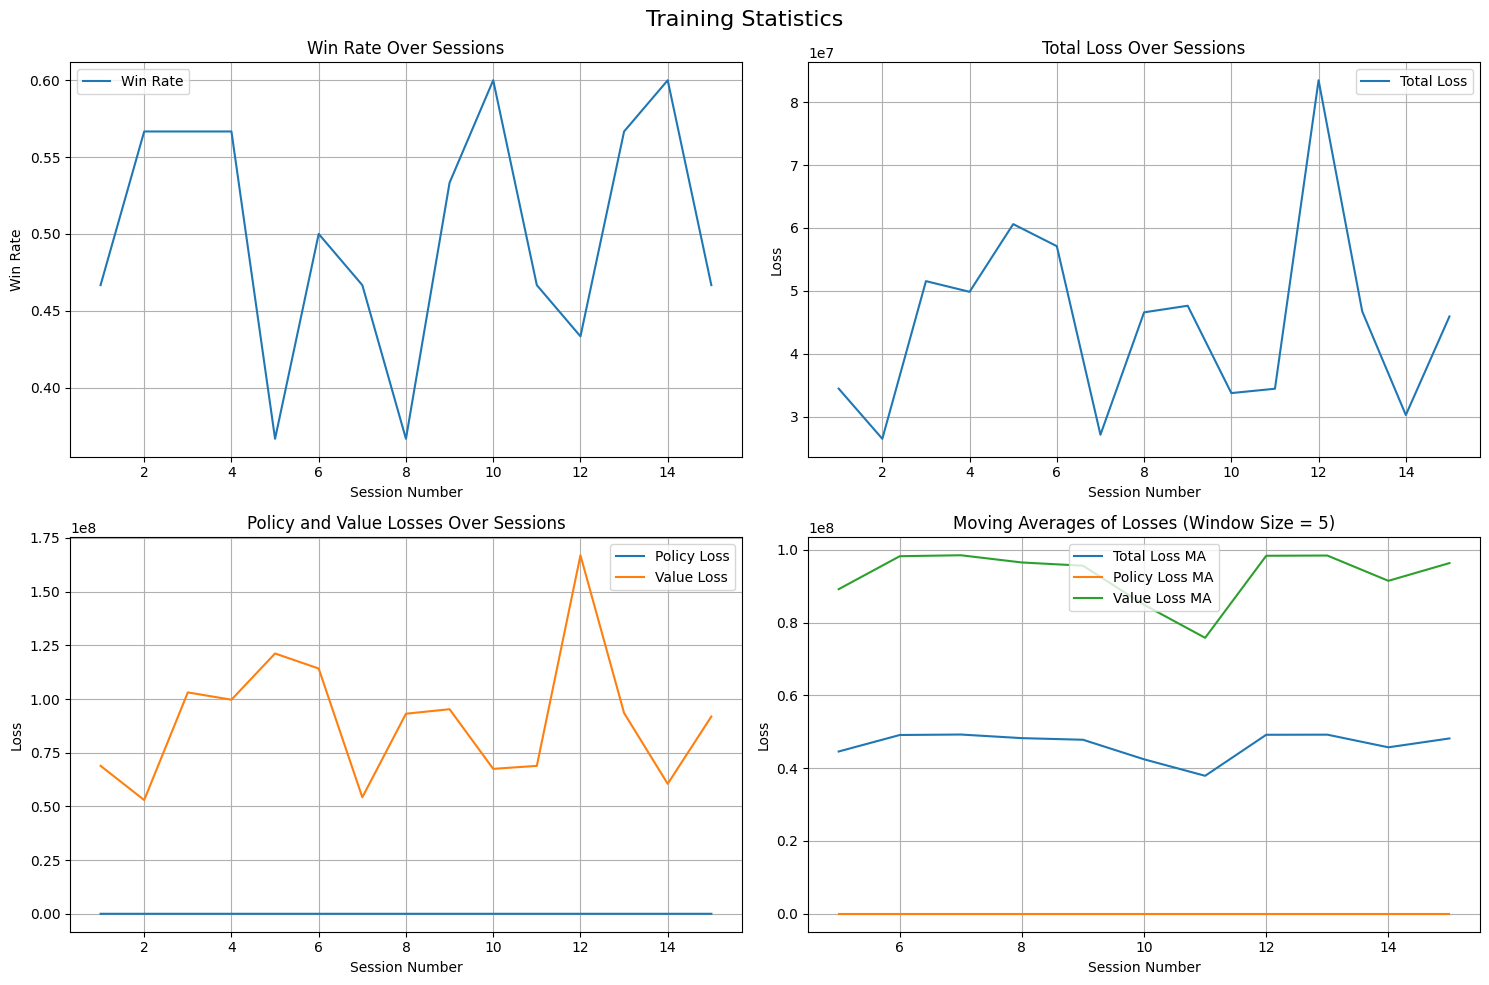

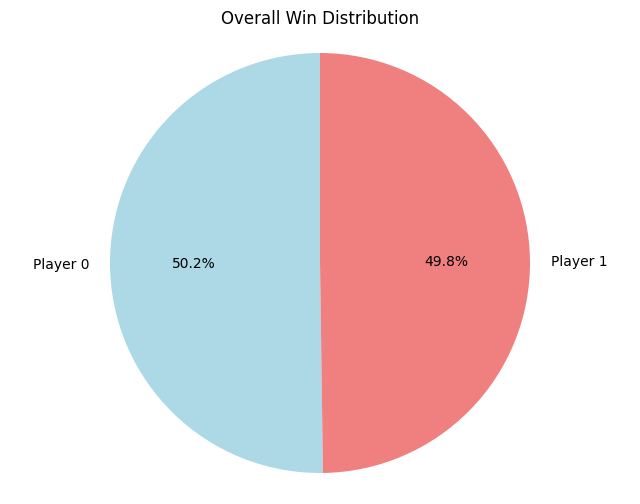

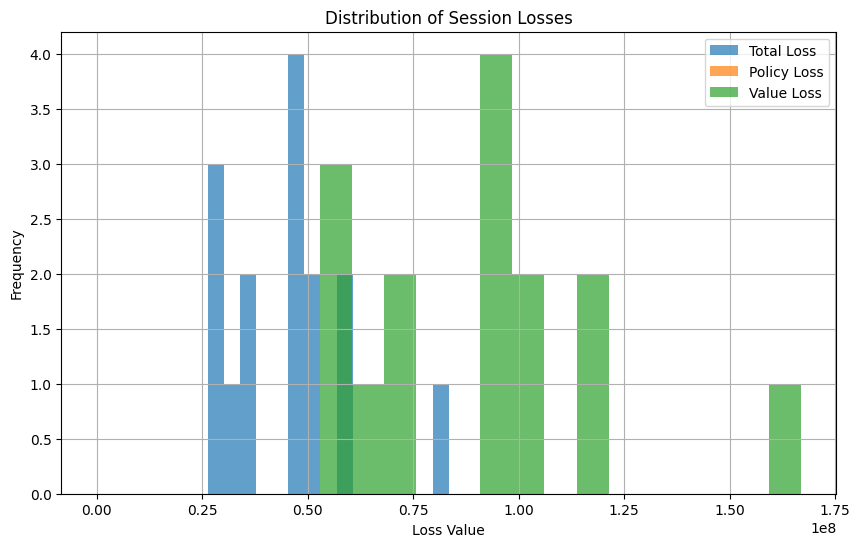

In [4]:
from importlib import reload

import utilities
reload(utilities)
from utilities import Utilities


Utilities.plot_all_stats(training_stats, save_dir=save_path)

In [5]:
print(training_stats)

{'session_win_rates': [0.4666666666666667, 0.5666666666666667, 0.5666666666666667, 0.5666666666666667, 0.36666666666666664, 0.5, 0.4666666666666667, 0.36666666666666664, 0.5333333333333333, 0.6, 0.4666666666666667, 0.43333333333333335, 0.5666666666666667, 0.6, 0.4666666666666667], 'session_total_losses': [34451965.7358431, 26479616.317213543, 51541225.19151587, 49844428.782756604, 60607157.98817554, 57097057.566173814, 27123787.899980363, 46582129.09194139, 47628846.73331017, 33744402.273124106, 34439259.79739566, 83473482.95117609, 46741989.889629796, 30257572.98629884, 45931720.64687205], 'session_policy_losses': [21.64740647275207, 86.43177442965566, 73.65963721403318, 77.18087634496634, 45.88458609949672, 82.92230461341225, 40.253283002060705, 119.88129658393395, 32.99619333193578, 81.52015709179018, 50.17617139866561, 4.0207497500408245, 41.28654737643556, 38.78175869938749, 90.40694193134128], 'session_value_losses': [68903888.18159482, 52959059.78890865, 103082303.19982406, 9968